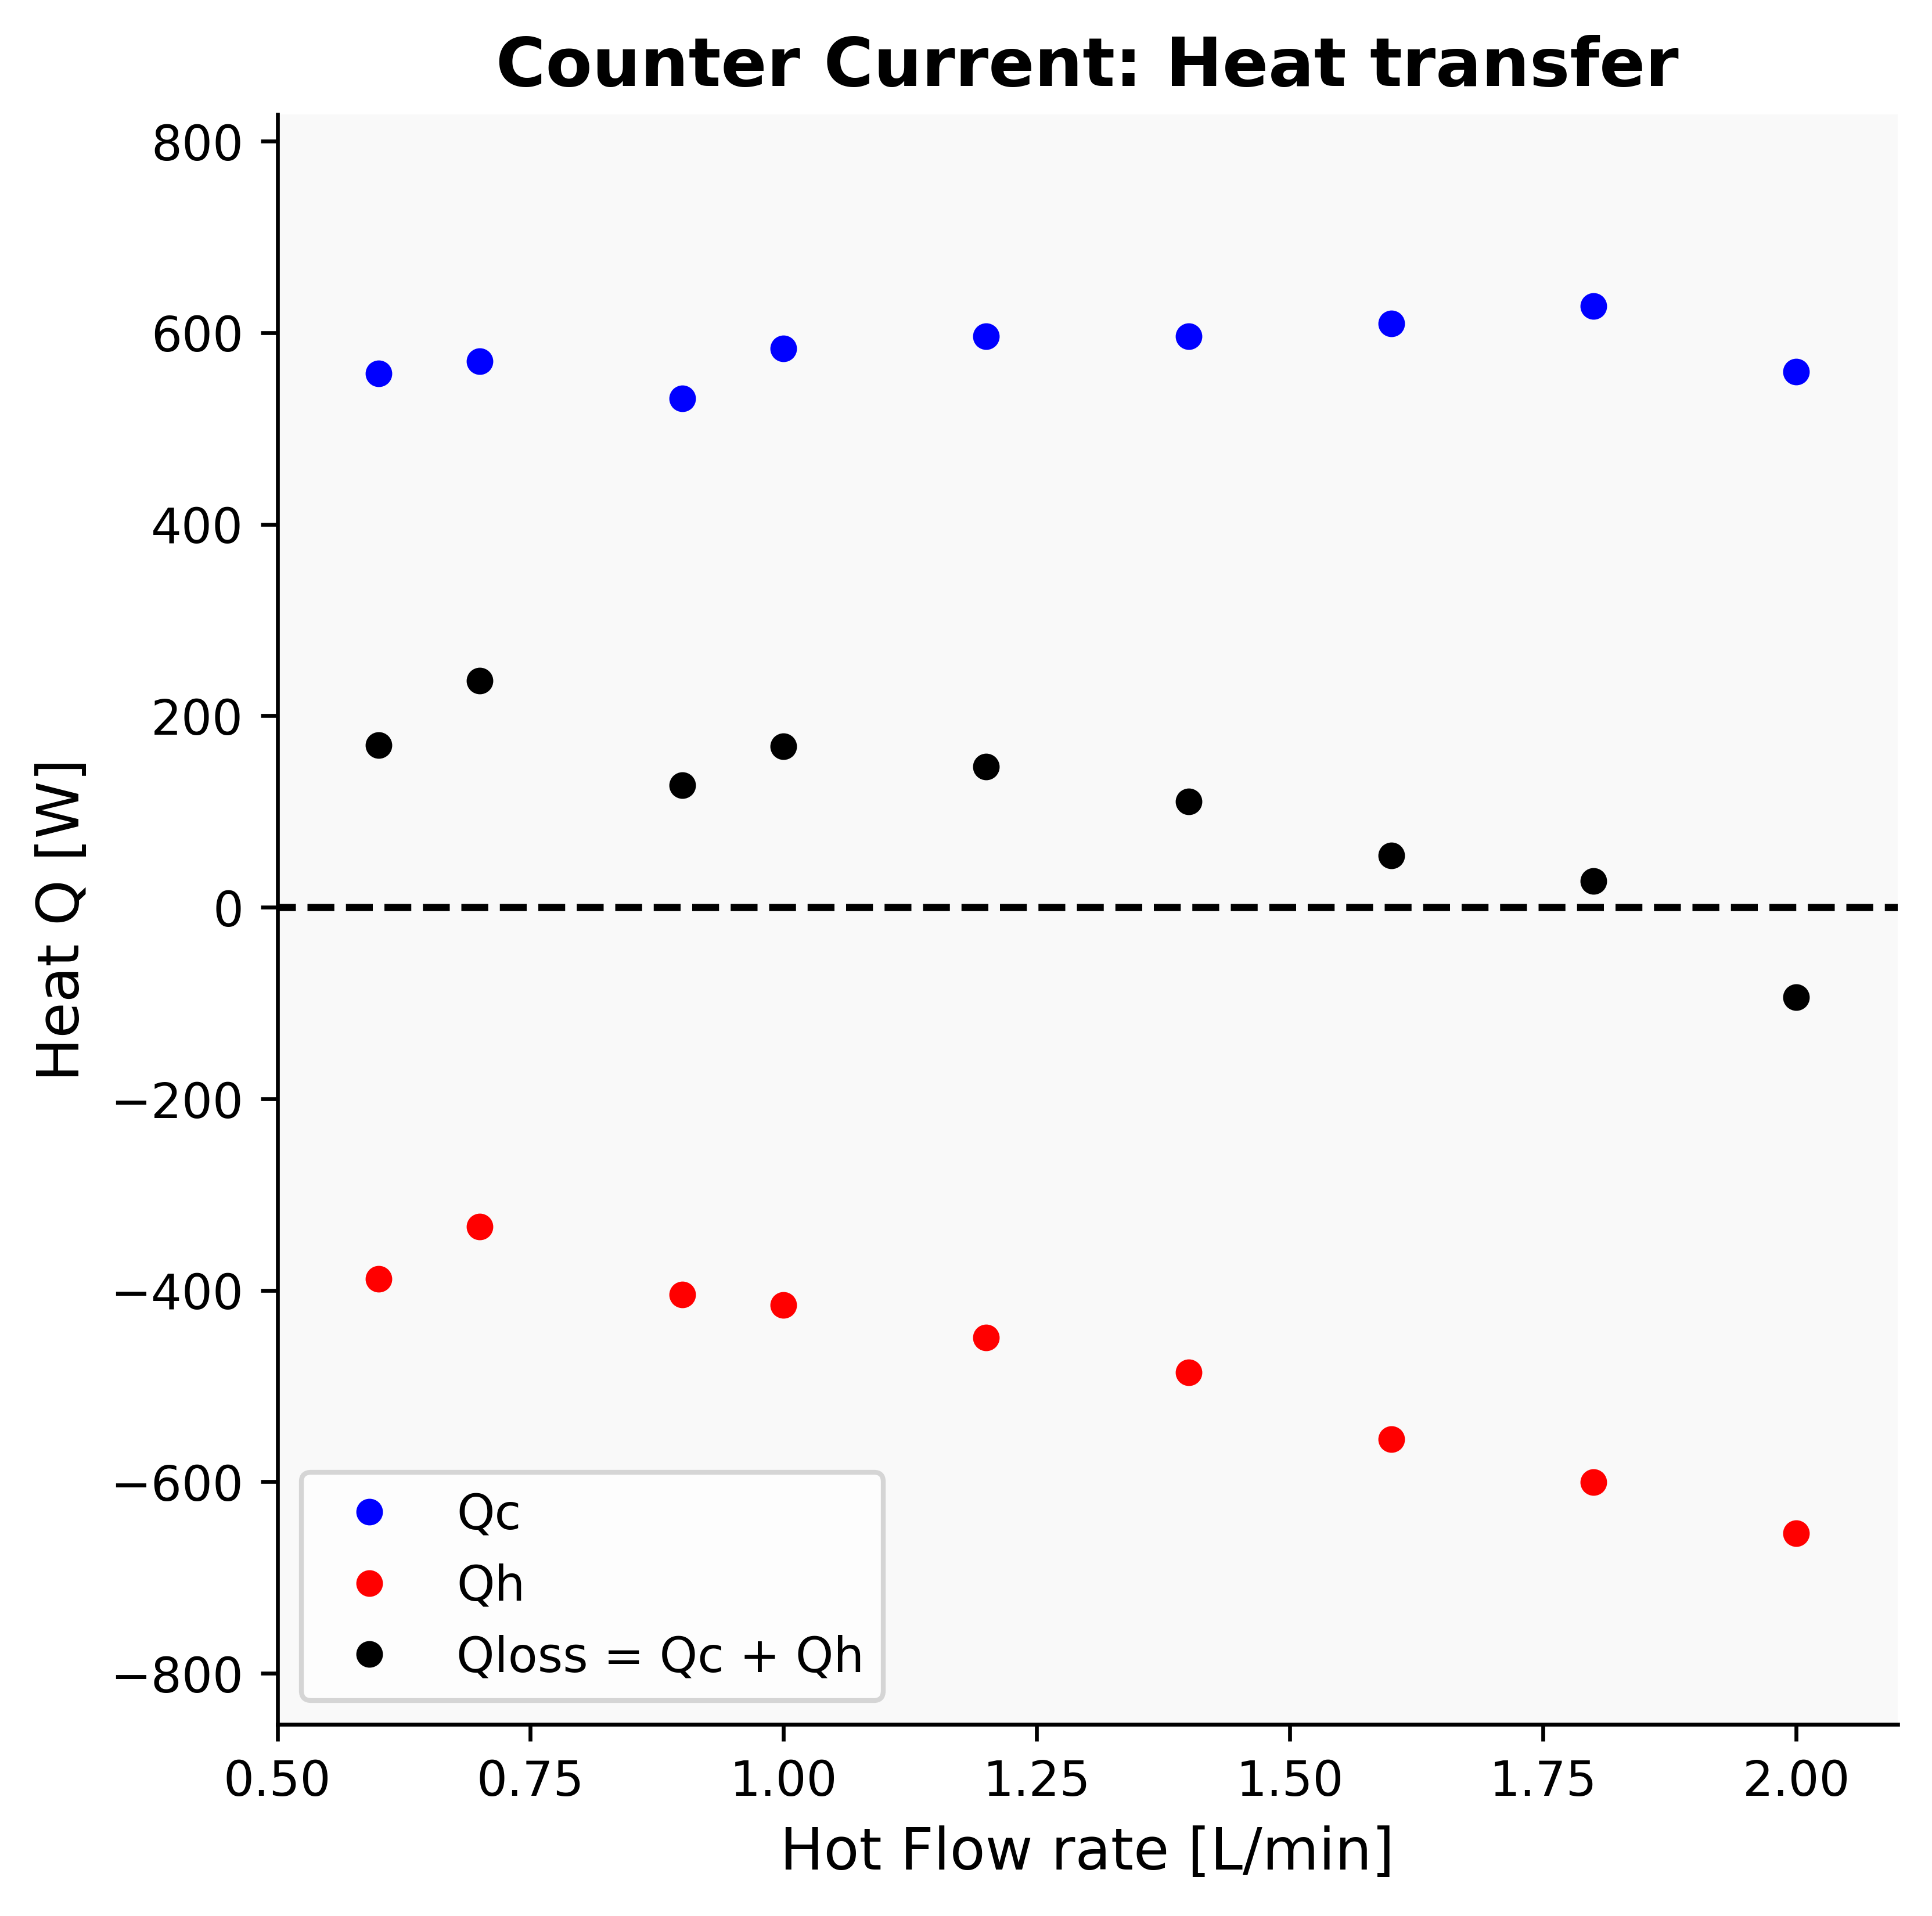

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
from scipy.stats import linregress
from scipy.optimize import curve_fit


def read_excel_data(file_path):
    df = pd.read_excel(file_path, sheet_name="Feuil1", skiprows=1)
    return df

def plot_graph(data_frame):
    stx = data_frame['SC-1'][0:9].tolist()
    sty = data_frame['Q(cold) [J/s]'][0:9].tolist()
    sty2 = data_frame['Q(hot)[J/s]'][0:9].tolist()
    sty4 = data_frame['Q(loss) [J/s]'][0:9].tolist()
    
    x = [float(x) for x in stx]
    y = [float(x) for x in sty]
    y2 = [float(x) for x in sty2]
    y4 = [float(x) for x in sty4]
    
    x3=[0.2,2.2]
    y3=[0,0]

    plt.figure(figsize=(6, 6), dpi=600)  # Adjust figure size for better presentation

    # Plot data with specific style elements
    plt.plot(x, y, label='Qc', color='blue', linestyle='', marker='.', markersize=9, linewidth=1.5)
    plt.plot(x, y2, label='Qh', color='red', linestyle='', marker='.', markersize=9, linewidth=1.5)
    plt.plot(x, y4, label='Qloss = Qc + Qh', color='black', linestyle='', marker='.', markersize=9, linewidth=1.5)
    
    plt.plot(x3, y3, color='black', linestyle='--', marker='', markersize=9, linewidth=1.5)

    plt.xlabel('Hot Flow rate [L/min]', fontsize=12)
    plt.ylabel('Heat Q [W]', fontsize=12)
    plt.title('Counter Current: Heat transfer', fontsize=14, weight='bold')

    # Round x-axis ticks to two decimal places
    #rounded_ticks = [round(float(val), 2) for val in x]
    #plt.xticks(ticks=rounded_ticks, fontsize=10)
    # Adjust grid density
    plt.xticks(ticks=plt.xticks()[0][::1], fontsize=10, rotation ='horizontal')
    plt.yticks(ticks=plt.yticks()[0][::1], fontsize=10)

    plt.grid(False)

    # Add a subtle background color
    plt.gca().set_facecolor('#f9f9f9')

    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Invert y-axis
    #plt.gca().invert_yaxis()
    
     # Set x-axis and y-axis limits
    delta_x=0.1
    delta_y=200
    plt.xlim(min(x)-delta_x, max(x)+delta_x)
    plt.ylim(min(y2)-delta_y, max(y)+delta_y)
    
    """
    fit_params = np.polyfit(x, y, 2)
    
    fit_line =[(fit_params[0] * x**2 + fit_params[1]*x + fit_params[2]) for x in x]
    
    # Display fitting curve equation
    R = (np.corrcoef(x, y)[0,1])**2
    equation = f'y = {fit_params[0]:.2f} * x^2 + {fit_params[1]:.2f} * x + {fit_params[2]:.2f}'
    #plt.text(1, 12, equation, fontsize=8, color='green', verticalalignment='top')
    
    # Plot logarithmic fitting line
    plt.plot(x, fit_line, label=f'Quadratic Regression: {equation}\n (R={R:.3f})', color='green', linestyle='--', linewidth=2)
    
    """
    
   
    
    
    
    plt.legend()
    
   
    
def save_svg(file_path):
    plt.savefig(file_path + ".png", format='png')  # Save as a PNG file for matplotlib
    plt.savefig(file_path + ".svg", format='svg')  # Save as an SVG file for vector format

def main():
    excel_file_path = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-1_Q/Res_Counter.xlsx"
    download_folder =r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-1_Q/"

    # Read data from Excel file
    data = read_excel_data(excel_file_path)

    # Plot the graph
    plot_graph(data)
    
    # Save the graph as an SVG file and download it
    svg_file_path = os.path.join(download_folder, 'Counter_Current_Q-F')
    save_svg(svg_file_path)
    
    plt.show()

if __name__ == "__main__":
    main()
